In [136]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [137]:
# БАРИСТА
def clean_data(data):
     cleaned_data = []
     for item in data:
        try:
           salary = item['salary'].replace('\u2009', '').replace('\xa0', ' ')
           experience = item['experience'].replace('\xa0', ' ')
           cleaned_data.append({'salary': salary, 'experience': experience})
        except TypeError:
           continue
     return cleaned_data
# Попросил чат-гпт написать функцию, которая бы приводила информацию в нормальный вид, и добавил try / except, чтобы избежать проблем с пустыми элементами списка

candidates_barista = []

for i in range(20): # Берем первые 20 страниц и анализируем вакансиии, представленные на них
  html = f'https://hh.ru/search/resume?area=1&exp_period=all_time&job_search_status=active_search&job_search_status=looking_for_offers&logic=normal&no_magic=true&order_by=relevance&ored_clusters=true&pos=full_text&search_period=30&text=%D0%B1%D0%B0%D1%80%D0%B8%D1%81%D1%82%D0%B0+%D0%B2+%D0%BA%D0%BE%D1%84%D0%B5%D0%B9%D0%BD%D1%8E&items_on_page=20&searchSessionId=59616e58-395a-4e21-8c7c-631a268c021f&page={i}'
  response = requests.get(html, headers={"User-Agent": "Mozilla/5.0"}) # Получаем html
  soup = BeautifulSoup(response.content, 'html.parser') # Создаем объект BeautifulSoup

  candidates = [] # Список кандидатов
  candidates.append(None) # Чтобы потом не было проблем с "if candidate_data == candidates[-1]:"

  for candidate in soup.find_all('div'):
     salary_element = candidate.find('div', class_='magritte-text_typography-subtitle-2-semibold___3q3c-_3-0-31') # Вытаскиваем з/п
     experience_element = candidate.find('div', class_='content--vAUqut0YCUxg4xgv') # Вытаскиваем информацию об опыте кандидатов

     if salary_element and experience_element:
         candidate_data = {'salary': salary_element.text.strip(), 'experience': experience_element.text.strip()} # Добавляем в итоговый список словарь с информацией о кандидате
         if candidate_data == candidates[-1]:
           pass
         elif '\u20BD' in candidate_data['salary']:
           candidates.append(candidate_data)
     # Если есть информация об опыте и з/п, то добавляем в список кандидатов
     # Была проблема, что информация об одном и том же кандидате выводится несколько раз подряд (блоками), поэтому проверяем, что добавляемый элемент отличен от прошлого добавленного
     # Некоторые слегка обнаглевшие люди указывают з/п в долларах и евро, удаляем их из списка

  final_data = clean_data(candidates) # Приводим в нормальный вид
  candidates_barista.extend(final_data) # Перевод списка словарей в датафреймм 

  for item in final_data:
     print(item)

df_barista = pd.DataFrame(candidates_barista)
df_barista = df_barista.transpose()
display(df_barista)

{'salary': '150000 ₽', 'experience': '8 лет 5 месяцев'}
{'salary': '150000 ₽', 'experience': '13 лет 3 месяца'}
{'salary': '50000 ₽', 'experience': '2 года 4 месяца'}
{'salary': '150000 ₽', 'experience': '10 лет 1 месяц'}
{'salary': '120000 ₽', 'experience': '8 лет 8 месяцев'}
{'salary': '100000 ₽', 'experience': '7 лет'}
{'salary': '100000 ₽', 'experience': '10 лет 3 месяца'}
{'salary': '90000 ₽', 'experience': '3 года 10 месяцев'}
{'salary': '120000 ₽', 'experience': '7 лет 7 месяцев'}
{'salary': '115000 ₽', 'experience': '12 лет 7 месяцев'}
{'salary': '80000 ₽', 'experience': '6 лет 8 месяцев'}
{'salary': '150000 ₽', 'experience': '11 лет'}
{'salary': '140000 ₽', 'experience': '7 лет 11 месяцев'}
{'salary': '60000 ₽', 'experience': '4 года 2 месяца'}
{'salary': '70000 ₽', 'experience': '8 лет 3 месяца'}
{'salary': '80000 ₽', 'experience': '5 лет 6 месяцев'}
{'salary': '30000 ₽', 'experience': 'Ответственность  •  Терпеливость  •  Пунктуальность  •  Желание работать  •  Грамотная реч

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
salary,150000 ₽,150000 ₽,50000 ₽,150000 ₽,120000 ₽,100000 ₽,100000 ₽,90000 ₽,120000 ₽,115000 ₽,...,100000 ₽,80000 ₽,50000 ₽,50000 ₽,150000 ₽,150000 ₽,150000 ₽,400000 ₽,120000 ₽,250000 ₽
experience,8 лет 5 месяцев,13 лет 3 месяца,2 года 4 месяца,10 лет 1 месяц,8 лет 8 месяцев,7 лет,10 лет 3 месяца,3 года 10 месяцев,7 лет 7 месяцев,12 лет 7 месяцев,...,4 года 2 месяца,10 лет 1 месяц,9 лет 4 месяца,10 месяцев,9 лет 9 месяцев,6 лет 4 месяца,6 лет 5 месяцев,14 лет 6 месяцев,6 лет 10 месяцев,12 лет 5 месяцев


In [139]:
# Делаем все ячейки строками + удаляем колонки со странной информацией вместо experience. 
# Теперь формат ячейки experience: количество лет и месяцев опыта

words = ["год", "года", "месяц", "месяца", "лет"] # Оставляем в датафрейме только ячейки, в которых есть эти слова 

df_barista_new = df_barista.copy()

for column in df_barista.columns:
    experience = str(df_barista.loc["experience", column])
    for word in words:
      if word in experience:
        break # Если слово есть, ничего не делаем
    else:
      df_barista_new = df_barista_new.drop(columns=[column]) # Удаляем столбец, если информации об опыте работы нет

display(df_barista_new)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
salary,150000 ₽,150000 ₽,50000 ₽,150000 ₽,120000 ₽,100000 ₽,100000 ₽,90000 ₽,120000 ₽,115000 ₽,...,100000 ₽,80000 ₽,50000 ₽,50000 ₽,150000 ₽,150000 ₽,150000 ₽,400000 ₽,120000 ₽,250000 ₽
experience,8 лет 5 месяцев,13 лет 3 месяца,2 года 4 месяца,10 лет 1 месяц,8 лет 8 месяцев,7 лет,10 лет 3 месяца,3 года 10 месяцев,7 лет 7 месяцев,12 лет 7 месяцев,...,4 года 2 месяца,10 лет 1 месяц,9 лет 4 месяца,10 месяцев,9 лет 9 месяцев,6 лет 4 месяца,6 лет 5 месяцев,14 лет 6 месяцев,6 лет 10 месяцев,12 лет 5 месяцев


In [140]:
# Готовим датасет к работе с ним
df_barista_new.loc['salary'] = df_barista_new.loc['salary'].str.replace(' ₽', '')
df_barista_new.loc['salary'] = df_barista_new.loc['salary'].str.replace(' ', '')

# Оставляем только первое число в опыте (количество лет)
df_barista_new.loc['experience'] = df_barista_new.loc['experience'].str.split().str[0]

# Меняем тип всех ячеек на int
df_barista_new.loc['experience'] = df_barista_new.loc['experience'].astype(int) 
df_barista_new.loc['salary'] = df_barista_new.loc['salary'].astype(int)

display(df_barista_new)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
salary,150000,150000,50000,150000,120000,100000,100000,90000,120000,115000,...,100000,80000,50000,50000,150000,150000,150000,400000,120000,250000
experience,8,13,2,10,8,7,10,3,7,12,...,4,10,9,10,9,6,6,14,6,12


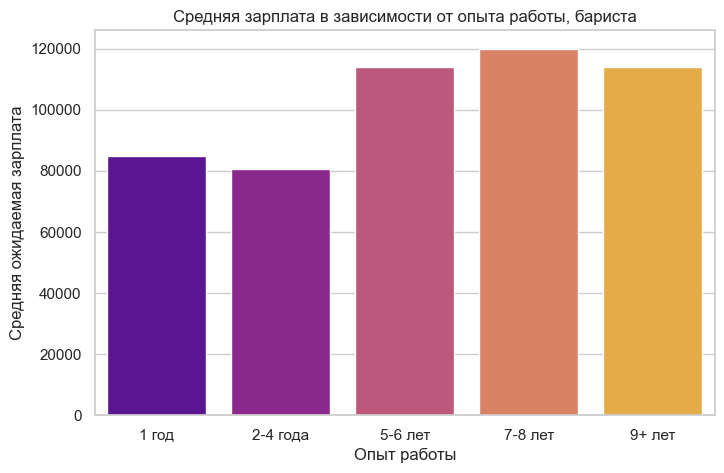

In [141]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

groups = []

for item in df_barista_new.loc['experience']:

    if item == 1:
        groups.append('1 год')
    elif 2 <= item <= 4:
        groups.append('2-4 года')
    elif 5 <= item <= 6:
        groups.append('5-6 лет')
    elif 7 <= item <= 8:
        groups.append('7-8 лет')
    else:
        groups.append('9+ лет')

# Использовал чат-гпт, чтобы добавить деление на группы
df_barista_new.loc['Experience Group'] = groups
df_grouped = df_barista_new.T.groupby('Experience Group')['salary'].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(x='Experience Group', y='salary', data=df_grouped, palette='plasma')
plt.xlabel('Опыт работы')
plt.ylabel('Средняя ожидаемая зарплата')
plt.title('Средняя зарплата в зависимости от опыта работы, бариста')

plt.show()

 **Далее идейно такой же код, просто меняем ссылки и учитываем особенности страниц**

In [144]:
# АДМИНИСТРАТОР ЗАЛА
# КРИТЕРИИ, ПО КОТОРЫМ ПРОВОДИЛИ ОТБОР: 1) полная занятость; 2) полный день; 3) специализации: администратор или менеджер ресторана

def clean_data(data):
     cleaned_data = []
     for item in data:
        try:
           salary = item['salary'].replace('\u2009', '').replace('\xa0', ' ')
           experience = item['experience'].replace('\xa0', ' ')
           cleaned_data.append({'salary': salary, 'experience': experience})
        except TypeError:
           continue
     return cleaned_data
# Попросил чат-гпт написать функцию, которая бы приводила информацию в нормальный вид, и добавил try / except, чтобы избежать проблем с пустыми элементами списка

candidates_manager = []

for i in range(20): # Берем первые 20 страниц
  html = f'https://hh.ru/search/resume?search_period=0&order_by=relevance&logic=normal&pos=full_text&exp_period=all_time&area=1&employment=full&filter_exp_period=all_time&job_search_status=active_search&job_search_status=looking_for_offers&job_search_status=unknown&professional_role=8&professional_role=74&relocation=living_or_relocation&schedule=fullDay&text=администратор+в+кофейню&gender=unknown&page={i}&searchSessionId=3636c17e-0578-45ff-ba81-15591c276518'
  response = requests.get(html, headers={"User-Agent": "Mozilla/5.0"}) # Получаем html
  soup = BeautifulSoup(response.content, 'html.parser') # Создаем объект BeautifulSoup

  candidates = [] # Список кандидатов
  candidates.append(None) # Чтобы потом не было проблем с "if candidate_data == candidates[-1]:"

  for candidate in soup.find_all('div'):

     salary_element = candidate.find('div', class_='magritte-text_typography-subtitle-2-semibold___3q3c-_3-0-31') # Вытаскиваем з/п
     experience_element = candidate.find('div', class_='content--vAUqut0YCUxg4xgv') # Вытаскиваем информацию об опыте кандидатов

     if salary_element and experience_element:
         candidate_data = {'salary': salary_element.text.strip(), 'experience': experience_element.text.strip()} # Добавляем в итоговый список словарь с информацией о кандидате
         if candidate_data == candidates[-1]:
           pass
         elif '\u20BD' in candidate_data['salary']:
           candidates.append(candidate_data)
     # Если есть информация об опыте и з/п, то добавляем в список кандидатов
     # Была проблема, что информация об одном и том же кандидате выводится несколько раз подряд, поэтому проверяем, что добавляемы элемент отличен от прошлого добавленного
     # Некоторые слегка обнаглевшие люди указывают з/п в долларах и евро, удаляем их из списка

  final_data = clean_data(candidates) # Приводим в нормальный вид
  candidates_manager.extend(final_data) # Перевод списка словарей в датафрейм 

  # for item in final_data:
  #    print(item)

df_manager = pd.DataFrame(candidates_manager)
df_manager = df_manager.transpose()
display(df_manager)

,0,1,2,3,4,5,6,7,8,9,...,328,329,330,331,332,333,334,335,336,337
salary,35000 ₽,35000 ₽,45000 ₽,100000 ₽,65000 ₽,105000 ₽,45000 ₽,150000 ₽,30000 ₽,90000 ₽,...,25000 ₽,60000 ₽,40000 ₽,35000 ₽,45000 ₽,30000 ₽,40000 ₽,50000 ₽,30000 ₽,50000 ₽
experience,8 лет 5 месяцев,12 лет 10 месяцев,13 лет 4 месяца,19 лет 10 месяцев,10 лет,4 года 7 месяцев,15 лет 10 месяцев,12 лет 1 месяц,3 года 7 месяцев,11 лет,...,5 лет 2 месяца,7 лет 1 месяц,21 год 9 месяцев,14 лет 10 месяцев,6 лет 9 месяцев,24 года 3 месяца,2 года 8 месяцев,13 лет 8 месяцев,7 лет 11 месяцев,6 лет 1 месяц


In [145]:
words = ["год", "года", "месяц", "месяца", "лет"]

df_manager_new = df_manager.copy()

for column in df_manager.columns:
    experience = str(df_manager.loc["experience", column])  
    for word in words:
      if word in experience:
        break
    else:
      df_manager_new = df_manager_new.drop(columns=[column])

display(df_manager_new)

,0,1,2,3,4,5,6,7,8,9,...,328,329,330,331,332,333,334,335,336,337
salary,35000 ₽,35000 ₽,45000 ₽,100000 ₽,65000 ₽,105000 ₽,45000 ₽,150000 ₽,30000 ₽,90000 ₽,...,25000 ₽,60000 ₽,40000 ₽,35000 ₽,45000 ₽,30000 ₽,40000 ₽,50000 ₽,30000 ₽,50000 ₽
experience,8 лет 5 месяцев,12 лет 10 месяцев,13 лет 4 месяца,19 лет 10 месяцев,10 лет,4 года 7 месяцев,15 лет 10 месяцев,12 лет 1 месяц,3 года 7 месяцев,11 лет,...,5 лет 2 месяца,7 лет 1 месяц,21 год 9 месяцев,14 лет 10 месяцев,6 лет 9 месяцев,24 года 3 месяца,2 года 8 месяцев,13 лет 8 месяцев,7 лет 11 месяцев,6 лет 1 месяц


In [146]:
# Готовим датасет к работе с ним
df_manager_new.loc['salary'] = df_manager_new.loc['salary'].str.replace(' ₽', '')
df_manager_new.loc['salary'] = df_manager_new.loc['salary'].str.replace(' ', '')

# Оставляем только первое число в опыте (количество лет)
df_manager_new.loc['experience'] = df_manager_new.loc['experience'].str.split().str[0]


# Меняем тип всех ячеек на int
df_manager_new.loc['experience'] = df_manager_new.loc['experience'].astype(int)
df_manager_new.loc['salary'] = df_manager_new.loc['salary'].astype(int)

display(df_manager_new)

,0,1,2,3,4,5,6,7,8,9,...,328,329,330,331,332,333,334,335,336,337
salary,35000,35000,45000,100000,65000,105000,45000,150000,30000,90000,...,25000,60000,40000,35000,45000,30000,40000,50000,30000,50000
experience,8,12,13,19,10,4,15,12,3,11,...,5,7,21,14,6,24,2,13,7,6


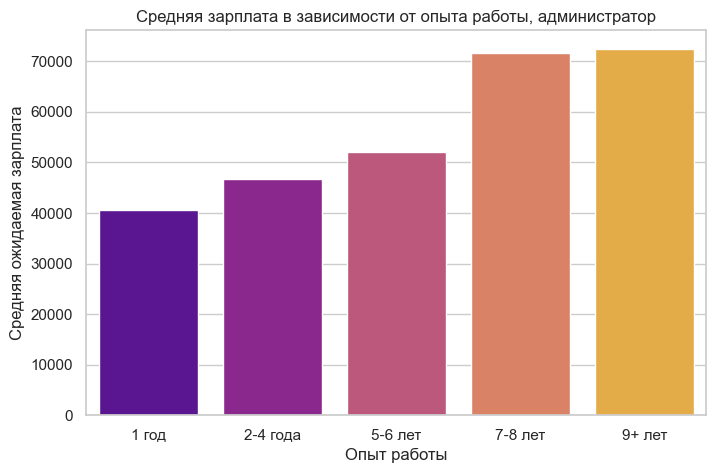

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

groups = []

for item in df_manager_new.loc['experience']:

    if item == 1:
        groups.append('1 год')
    elif 2 <= item <= 4:
        groups.append('2-4 года')
    elif 5 <= item <= 6:
        groups.append('5-6 лет')
    elif 7 <= item <= 8:
        groups.append('7-8 лет')
    else:
        groups.append('9+ лет')

# Использовал чат-гпт, чтобы добавить деление на группы
df_manager_new.loc['Experience Group'] = groups
df_grouped = df_manager_new.T.groupby('Experience Group')['salary'].mean().reset_index()

# Строим график
plt.figure(figsize=(8, 5))
sns.barplot(x='Experience Group', y='salary', data=df_grouped, palette='plasma')
plt.xlabel('Опыт работы')
plt.ylabel('Средняя ожидаемая зарплата')
plt.title('Средняя зарплата в зависимости от опыта работы, администратор')
 
plt.show()

In [148]:
# УБОРКА
# КРИТЕРИИ: 1) живет в регионе; 2) полный день; 3) полная занятость 4) специализации: уборщик / уборщица 5) з/п от 40000 (чтобы избежать нерелевантных предложений)

def clean_data(data):
     cleaned_data = []
     for item in data:
        try:
           salary = item['salary'].replace('\u2009', '').replace('\xa0', ' ')
           experience = item['experience'].replace('\xa0', ' ')
           cleaned_data.append({'salary': salary, 'experience': experience})
        except TypeError:
           continue
     return cleaned_data
# Попросил чат-гпт написать функцию, которая бы приводила информацию в нормальный вид, и добавил try / except, чтобы избежать проблем с пустыми элементами списка

candidates_cleaning = []

for i in range(20): # Берем первые 20 страниц
  html = f'https://hh.ru/search/resume?isDefaultArea=true&ored_clusters=true&order_by=relevance&search_period=0&logic=normal&pos=full_text&exp_period=all_time&area=1&employment=full&filter_exp_period=all_time&job_search_status=looking_for_offers&job_search_status=active_search&job_search_status=unknown&label=only_with_salary&professional_role=130&relocation=living&schedule=fullDay&text=уборщица+помещений&salary_from=40000&gender=unknown&page={i}&searchSessionId=5b744ea5-5b2a-4df1-ab68-e8af1a445272'
  response = requests.get(html, headers={"User-Agent": "Mozilla/5.0"}) # Получаем html
  soup = BeautifulSoup(response.content, 'html.parser') # Создаем объект BeautifulSoup

  candidates = [] # Список кандидатов
  candidates.append(None) # Чтобы потом не было проблем с "if candidate_data == candidates[-1]:"

  for candidate in soup.find_all('div'):

     salary_element = candidate.find('div', class_='magritte-text_typography-subtitle-2-semibold___3q3c-_3-0-31') # Вытаскиваем з/п
     experience_element = candidate.find('div', class_='content--vAUqut0YCUxg4xgv') # Вытаскиваем информацию об опыте кандидатов

     if salary_element and experience_element:
         candidate_data = {'salary': salary_element.text.strip(), 'experience': experience_element.text.strip()} # Добавляем в итоговый список словарь с информацией о кандидате
         if candidate_data == candidates[-1]:
           pass
         elif '\u20BD' in candidate_data['salary']:
           candidates.append(candidate_data)
     # Если есть информация об опыте и з/п, то добавляем в список кандидатов
     # Была проблема, что информация об одном и том же кандидате выводится несколько раз подряд, поэтому проверяем, что добавляемый элемент отличен от прошлого добавленного
     # Некоторые слегка обнаглевшие люди указывают з/п в долларах и евро, удаляем их из списка
    
  final_data = clean_data(candidates) # Приводим в нормальный вид
  candidates_cleaning.extend(final_data) # Перевод списка словарей в датафреймм 

  # for item in final_data:
  #    print(item)

df_cleaning = pd.DataFrame(candidates_cleaning)
df_cleaning = df_cleaning.transpose()
display(df_cleaning)

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
salary,40000 ₽,45000 ₽,70000 ₽,45000 ₽,40000 ₽,50000 ₽,70000 ₽,70000 ₽,40000 ₽,40000 ₽,...,40000 ₽,40000 ₽,40000 ₽,40000 ₽,45000 ₽,45000 ₽,40000 ₽,50000 ₽,50000 ₽,60000 ₽
experience,24 года 2 месяца,5 лет 3 месяца,5 лет 4 месяца,15 лет 9 месяцев,6 лет 8 месяцев,15 лет 9 месяцев,13 лет 3 месяца,12 лет 9 месяцев,11 лет 6 месяцев,25 лет 3 месяца,...,работоспособна • Работала помощник воспитате...,9 месяцев,10 лет 8 месяцев,13 лет 1 месяц,21 год 5 месяцев,10 лет,9 лет 8 месяцев,25 лет 7 месяцев,5 лет 7 месяцев,3 года 1 месяц


In [166]:
words = ["год", "года", "месяц", "месяца", "лет"]

df_cleaning_new = df_cleaning.copy()

for column in df_cleaning.columns:
    experience = str(df_cleaning.loc["experience", column])
    for word in words:
      if word in experience:
        break
    else:
      df_cleaning_new = df_cleaning_new.drop(columns=[column])

display(df_cleaning_new)

,0,1,2,3,4,5,6,7,8,9,...,221,223,224,225,226,227,228,229,230,231
salary,40000 ₽,45000 ₽,70000 ₽,45000 ₽,40000 ₽,50000 ₽,70000 ₽,70000 ₽,40000 ₽,40000 ₽,...,40000 ₽,40000 ₽,40000 ₽,40000 ₽,45000 ₽,45000 ₽,40000 ₽,50000 ₽,50000 ₽,60000 ₽
experience,24 года 2 месяца,5 лет 3 месяца,5 лет 4 месяца,15 лет 9 месяцев,6 лет 8 месяцев,15 лет 9 месяцев,13 лет 3 месяца,12 лет 9 месяцев,11 лет 6 месяцев,25 лет 3 месяца,...,6 месяцев,9 месяцев,10 лет 8 месяцев,13 лет 1 месяц,21 год 5 месяцев,10 лет,9 лет 8 месяцев,25 лет 7 месяцев,5 лет 7 месяцев,3 года 1 месяц


In [167]:
# Готовим датасет к работе с ним
df_cleaning_new.loc['salary'] = df_cleaning_new.loc['salary'].str.replace(' ₽', '')
df_cleaning_new.loc['salary'] = df_cleaning_new.loc['salary'].str.replace(' ', '')

# Оставляем только первое число в опыте (количество лет)
df_cleaning_new.loc['experience'] = df_cleaning_new.loc['experience'].str.split().str[0]

df_cleaning_new.loc['experience'] = df_cleaning_new.loc['experience'].astype(int)
df_cleaning_new.loc['salary'] = df_cleaning_new.loc['salary'].astype(int)

display(df_cleaning_new)

,0,1,2,3,4,5,6,7,8,9,...,221,223,224,225,226,227,228,229,230,231
salary,40000,45000,70000,45000,40000,50000,70000,70000,40000,40000,...,40000,40000,40000,40000,45000,45000,40000,50000,50000,60000
experience,24,5,5,15,6,15,13,12,11,25,...,6,9,10,13,21,10,9,25,5,3


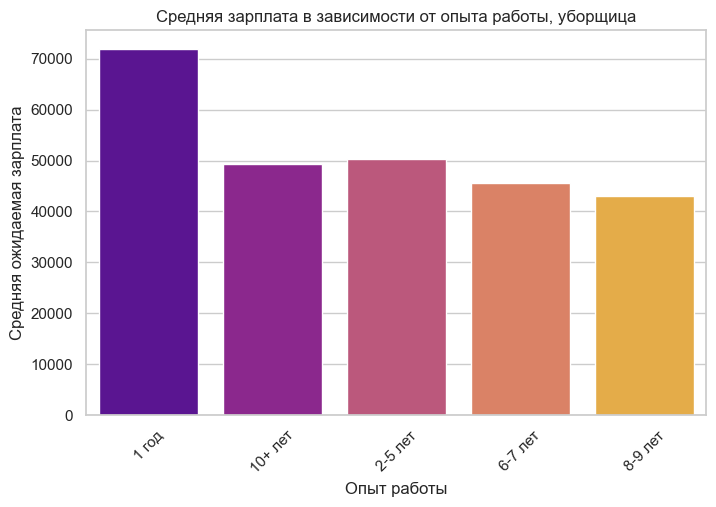

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

groups = []

for item in df_cleaning_new.loc['experience']:

    if item == 1:
        groups.append('1 год')
    elif 2 <= item <= 5:
        groups.append('2-5 лет')
    elif 6 <= item <= 7:
        groups.append('6-7 лет')
    elif 8 <= item <= 9:
        groups.append('8-9 лет')
    else:
        groups.append('10+ лет')

# Использовал чат-гпт, чтобы добавить деление на группы
df_cleaning_new.loc['Experience Group'] = groups
df_grouped = df_cleaning_new.T.groupby('Experience Group')['salary'].mean().reset_index()

# Строим график
plt.figure(figsize=(8, 5))
sns.barplot(x='Experience Group', y='salary', data=df_grouped, palette='plasma')
plt.xlabel('Опыт работы')
plt.ylabel('Средняя ожидаемая зарплата')
plt.title('Средняя зарплата в зависимости от опыта работы, уборщица')
plt.xticks(rotation=45)
plt.show()

**Теперь построим график, на котором объединим информацию о всех сотрудниках:**

In [ ]:
df_barista_new = df_barista_new.T
df_cleaning_new = df_cleaning_new.T
df_manager_new = df_manager_new.T

# Группируем информацию о зарплатах в зависимости от опыта для бариста
groups_barista = []
for item in df_barista_new['experience']:  
    if item == 1:
        groups_barista.append('1 год')
    elif 2 <= item <= 4:
        groups_barista.append('2-4 года')
    elif 4 <= item <= 6:
        groups_barista.append('4-6 лет')
    elif 7 <= item <= 8:
        groups_barista.append('7-8 лет')
    else:
        groups_barista.append('9+ лет')

df_barista_new['Experience Group'] = groups_barista
df_barista_grouped = df_barista_new.groupby('Experience Group')['salary'].mean().reset_index()

# Группируем информацию о зарплатах в зависимости от опыта для уборщиц
for item in df_cleaning_new['experience']:
    if item == 1:
        groups_cleaning.append('1 год')
    elif 2 <= item <= 5:
        groups_cleaning.append('2-4 года')
    elif 6 <= item <= 7:
        groups_cleaning.append('4-6 лет')
    elif 8 <= item <= 9:
        groups_cleaning.append('7-8 лет')
    else:
        groups_cleaning.append('9+ лет')

df_cleaning_new['Experience Group'] = groups_cleaning  
df_cleaning_grouped = df_cleaning_new.groupby('Experience Group')['salary'].mean().reset_index()

# Группируем информацию о зарплатах в зависимости от опыта для менеджеров
groups_manager = []
for item in df_manager_new['experience']: 
    if item == 1:
        groups_manager.append('1 год')
    elif 2 <= item <= 4:
        groups_manager.append('2-4 года')
    elif 4 <= item <= 6:
        groups_manager.append('4-6 лет')
    elif 7 <= item <= 8:
        groups_manager.append('7-8 лет')
    else:
        groups_manager.append('9+ лет')

df_manager_new['Experience Group'] = groups_manager
df_manager_grouped = df_manager_new.groupby('Experience Group')['salary'].mean().reset_index()

# Объединяем все в один датафрейм
df_barista_grouped['role'] = 'Бариста'
df_cleaning_grouped['role'] = 'Уборщица'
df_manager_grouped['role'] = 'Менеджер'
df_all = pd.concat([df_barista_grouped, df_cleaning_grouped, df_manager_grouped])

plt.figure(figsize=(10, 6))
sns.barplot(x='Experience Group', y='salary', hue='role', data=df_all, palette='plasma')
plt.xlabel('Опыт работы')
plt.ylabel('Средняя ожидаемая зарплата')
plt.title('Средняя зарплата в зависимости от опыта работы')
plt.xticks(rotation=45)
plt.legend(title='Должность')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df_manager_new['salary'], bins=20, kde=True, color='#9c179e', ax=axes[0])
axes[0].set_title('Распределение зарплат (Менеджеры)')
axes[0].set_xlabel('Зарплата')
axes[0].set_ylabel('Количество работников')
axes[0].set_xlim(20000, 300000)

sns.histplot(df_barista_new['salary'], bins=20, kde=True, color='#0d0887', ax=axes[1])
axes[1].set_title('Распределение зарплат (Бариста)')
axes[1].set_xlabel('Зарплата')
axes[1].set_xlim(20000, 300000)

sns.histplot(df_cleaning_new['salary'], bins=20, kde=True, color='#ed7953', ax=axes[2])
axes[2].set_title('Распределение зарплат (Уборщицы)')
axes[2].set_xlabel('Зарплата')
axes[2].set_xlim(20000, 180000)
axes[2].set_ylim(0, 120)

plt.tight_layout()
plt.show()

#['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df_manager_new['experience'], bins=10, kde=True, color='#9c179e', ax=axes[0])
axes[0].set_title('Распределение опыта (Менеджеры)')
axes[0].set_xlabel('Опыт работы')
axes[0].set_ylabel('Количество работников')

sns.histplot(df_barista_new['experience'], bins=10, kde=True, color='#0d0887', ax=axes[1])
axes[1].set_title('Распределение опыта (Бариста)')
axes[1].set_xlabel('Опыт работы')

sns.histplot(df_cleaning_new['experience'], bins=10, kde=True, color='#ed7953', ax=axes[2])
axes[2].set_title('Распределение опыта (Уборщицы)')
axes[2].set_xlabel('Опыт работы')

plt.tight_layout()
plt.savefig("barista_salary.png", dpi=300, bbox_inches='tight')  # Сохранение

plt.show()


In [ ]:
# SELENIUM

In [155]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  
from selenium.webdriver.common.action_chains import ActionChains
import time
driver = webdriver.Safari() 
driver.get("https://www.avito.ru/moskva/rabota") 

In [ ]:
# БАРИСТА

In [156]:
element = driver.find_element(By.ID, "bx_search") 

element.send_keys('Бариста ') 
element.send_keys('в кофейню') 
# Разбил на 2 строки, чтобы не сливалось в одно слово при вводе

element.send_keys(Keys.ENTER)

In [157]:
button = driver.find_element(By.CSS_SELECTOR, "a[data-marker='category[1000061]/clickable']")
button.click()
# Кликаем на кнопку "Ищу работу", чтобы получить информацию о том, сколько платят бариста другие кофейни

In [158]:
vacancies = []  
wage = None
shift = None

for i in range(20):
    elements = driver.find_elements(By.CSS_SELECTOR, 'div[data-marker="item"]')

    for elem in elements:
        try:
          title = elem.find_element(By.CSS_SELECTOR, 'h3[itemprop="name"]').text
          if 'рист' in title: # берем только вакансии, в которых есть слово "бариста"

             wage_block = elem.find_element(By.CSS_SELECTOR, 'p[data-marker="item-price"]')
             wage = wage_block.find_element(By.CSS_SELECTOR, 'span').text

            # Приводим цену в нормальный вид
             wage = wage.replace("\xa0", " ").strip()
             wage = wage.replace('₽', '').strip()
             wage = wage.replace('от', '').strip()
             wage = wage.replace('до', '').strip()

             if 'на руки' in wage:
                 after_taxes = True
             if 'сдельно' in wage or 'за смену' in wage:
                 shift = True

             wage = wage.replace('сдельно', '').strip() # С этими случаями нужно еще поработать
             wage = wage.replace('за смену', '').strip() 
             wage = wage.replace('на руки', '').strip() 
              
            # Работаем со случаем, когда цена представлена диапазоном, а не числом
             if '—' in wage:
                w_min, w_max = wage.split('—')
                w_min = int(w_min.replace(' ', ''))
                w_max = int(w_max.replace(' ', ''))
                wage = (w_min + w_max) // 2  # Среднее значение
             else:
                wage = int(wage.replace(' ', ''))  # Убираем пробелы и превращаем в число

             if after_taxes:
                wage = int(wage / 0.87)
             if shift:
                wage = 16 * wage
                 
             vacancies.append([title, wage])

             wage = None
             shift = None
        except Exception as e: 
          pass
 
    driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN) # Листаем
    time.sleep(0.75)  

driver.quit()

for item in vacancies:
    print(item)

['Бариста/ Шеф-Бариста', 119536]
['Бариста в кофейню', 63218]
['Бариста м. Коломенская', 81609]
['Бариста в кофейню «Бодрый день» в Космосе', 86206]
['Бариста в кофейню с оплатой', 82752]
['Бариста в кофейню', 74712]
['Бариста', 103448]
['Бариста 5/2 8:30-18:30 Электрозаводская/Бауманская', 97701]
['Бариста М. Аминьевская', 95402]
['Бариста выходного дня в кофейню "Тайна"', 66560]
['Бариста без опыта', 80000]
['Бариста', 3448]
['Бариста в кофейню', 86206]
['Вакансия Бариста', 79760]
['Бариста в кофейню (м. Юго-Западная)', 80459]
['Бариста в кофейню', 90112]
['Бариста в кофейню "Cofix"', 106321]
['Бариста в кофейню', 80459]
['Бариста в кофейню', 91954]
['Бариста без опыта работы', 80000]
['Бариста в кофейню Дринкит (м.Белорусская)', 60919]
['Бариста в кофейню', 109195]
['Бариста в кофейню Пан Круассан', 66928]
['Бариста - кассир в кофейню«Cinnabon»м.Новогиреево', 96551]
['Бариста в кофейню (не сеть)', 2873]
['Бариста - кассир в кофейню «cinnabon» м. Кузьминки', 83017]
['Бариста в кофейн

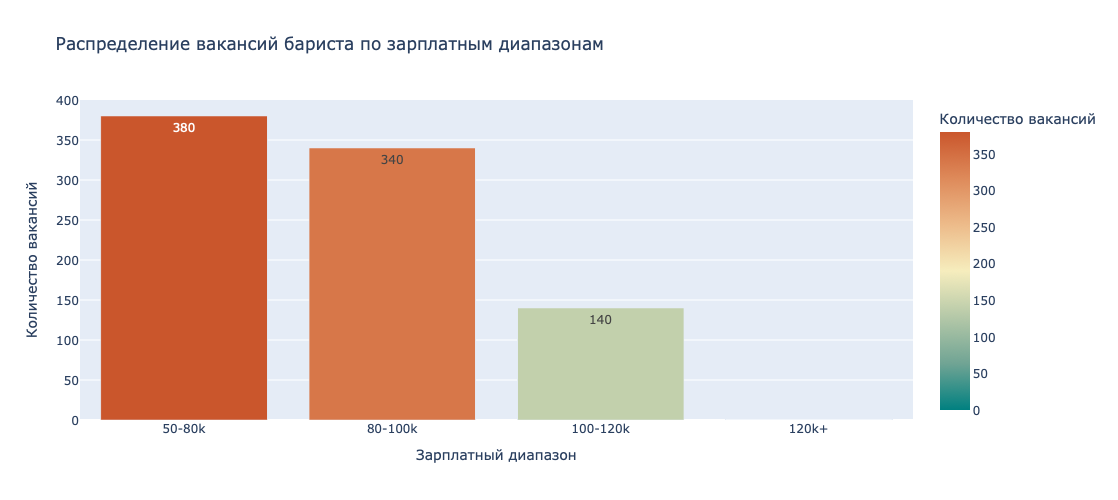

In [159]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame(vacancies, columns=["Вакансия", "Зарплата"])
df = df[(df["Зарплата"] >= 50000) & (df["Зарплата"] <= 200000)]

# Определяем диапазоны зарплат
df["Диапазон зарплат"] = pd.cut(df["Зарплата"], bins=[50000, 80000, 100000, 120000, 200000], labels=["50-80k", "80-100k", "100-120k", "120k+"])

# Группировка по диапазонам и подсчет количества вакансий 
df_barista_grouped_1 = df["Диапазон зарплат"].value_counts().reset_index() # Считаем количество вакансий в диапазоне
df_barista_grouped_1.columns = ["Диапазон зарплат", "Количество вакансий"]
df_barista_grouped_1 = df_barista_grouped_1.sort_values("Диапазон зарплат") # Сортируем значения

fig_bar_diap = px.bar(
    df_barista_grouped_1,
    x="Диапазон зарплат",
    y="Количество вакансий",
    title="Распределение вакансий бариста по зарплатным диапазонам",
    labels={"Количество вакансий": "Количество вакансий", "Диапазон зарплат": "Зарплатный диапазон"},
    color="Количество вакансий",
    color_continuous_scale="geyser",
    text_auto=True
)
fig_bar_diap.update_layout(height=500)
fig_bar_diap.show()


#### УБОРЩИЦА

In [160]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Импортируем Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
driver = webdriver.Safari() 
driver.get("https://www.avito.ru/moskva/rabota")

In [161]:
element = driver.find_element(By.ID, "bx_search") 

element.send_keys('Уборщик ') 
element.send_keys('в кафе') 
# Разбил на 2 строки, так как очень часто все сливалось в "Уборщиквкафе"

element.send_keys(Keys.ENTER)

In [163]:
button = driver.find_element(By.CSS_SELECTOR, "a[data-marker='category[1000061]/clickable']")
button.click()

In [164]:
vacancies = []  
wage = None
shift = None

for i in range(20):
    elements = driver.find_elements(By.CSS_SELECTOR, 'div[data-marker="item"]')

    for elem in elements:
        try:
          title = elem.find_element(By.CSS_SELECTOR, 'h3[itemprop="name"]').text
          if ('борщи' in title or 'лин' in title) and ('офе' in title or 'афе' in title or 'естора' in title): # берем только вакансии, в которых есть слово "бариста"

             wage_block = elem.find_element(By.CSS_SELECTOR, 'p[data-marker="item-price"]')
             wage = wage_block.find_element(By.CSS_SELECTOR, 'span').text

            # Приводим цену в нормальный вид
             wage = wage.replace("\xa0", " ").strip()
             wage = wage.replace('₽', '').strip()
             wage = wage.replace('от', '').strip()
             wage = wage.replace('до', '').strip()

             if 'на руки' in wage or "до налогов" in wage:
                 after_taxes = True
             if 'сдельно' in wage or 'за смену' in wage:
                 shift = True

             wage = wage.replace('сдельно', '').strip() # С этими случаями нужно еще поработать
             wage = wage.replace('за смену', '').strip()
             wage = wage.replace('на руки', '').strip()
              
             # Работаем со случаем, когда цена представлена диапазоном, а не числом
             if '—' in wage:
                w_min, w_max = wage.split('—')
                w_min = int(w_min.replace(' ', ''))
                w_max = int(w_max.replace(' ', ''))
                wage = (w_min + w_max) // 2  # Берем среднее, если з/п указана диапазоном
             else:
                wage = int(wage.replace(' ', ''))  # Убираем пробелы и превращаем в число

             if shift or '—' in title or 'ойщица' in title:
                pass
             elif after_taxes:
                wage = int(wage / 0.87)              
                vacancies.append([title, wage])
             else:
                vacancies.append([title, wage])

             wage = None
             shift = None
              
        except Exception as e: 
          pass
 
    driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN) 
    time.sleep(0.75)  

driver.quit()

for item in vacancies:
    print(item)

['Уборщик в ресторан', 104597]
['Уборщица/Уборщик в кафе', 109195]
['Уборщица в ресторан', 97701]
['Уборщица-в ресторан', 114942]
['Уборщик/уборщица в ресторан (м. Домодедовская)', 104597]
['Уборщица(к в ресторан м. Преображенская площадь', 109310]
['Уборщик в кафе', 137931]
['Уборщица/Уборщик в кафе', 109195]
['Уборщица в ресторан (еженедельная выплата )', 41954]
['Уборщица / Уборщик в ресторан', 68965]
['Уборщица в ресторан', 79310]
['Уборщик/ца в кафе платим каждый день', 77011]
['Уборщица - посудомойка в кафе м ЗИЛ с питанием', 102298]
['Уборщик в ресторан', 112068]
['Уборщик/Уборщица в ресторан', 106896]
['Уборщик в ресторан (ночь)', 98850]
['Уборщик в ресторан', 104597]
['Уборщица/Уборщик в кафе', 109195]
['Уборщица в ресторан', 97701]
['Уборщица-в ресторан', 114942]
['Уборщик/уборщица в ресторан (м. Домодедовская)', 104597]
['Уборщица(к в ресторан м. Преображенская площадь', 109310]
['Уборщик в кафе', 137931]
['Уборщица/Уборщик в кафе', 109195]
['Уборщица в ресторан (еженедельна

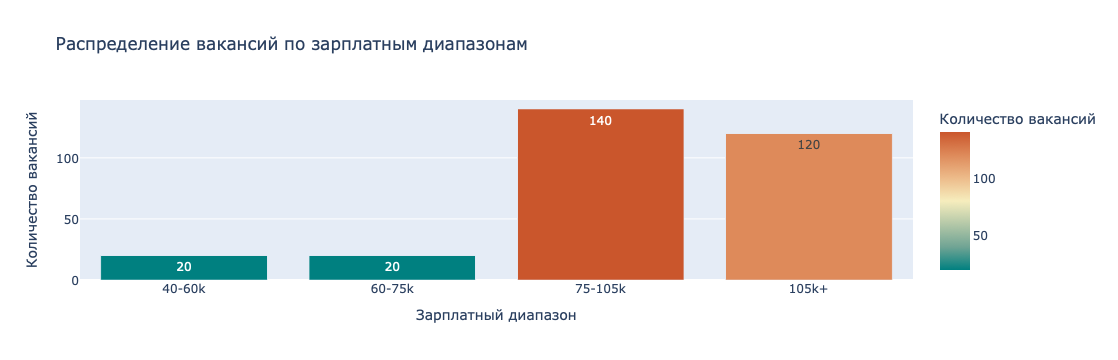

In [165]:
import pandas as pd
import plotly.express as px

df_1 = pd.DataFrame(vacancies, columns=["Вакансия", "Зарплата"])
df_1 = df_1[(df_1["Зарплата"] >= 40000) & (df_1["Зарплата"] <= 120000)]

# Определяем диапазоны зарплат
bins = [40000, 60000, 75000, 105000, 115000]
labels = ["40-60k", "60-75k", "75-105k", '105k+']
df_1["Диапазон зарплат"] = pd.cut(df_1["Зарплата"], bins=bins, labels=labels) # Делим на диапазоны

# Группировка по диапазонам и подсчет количества вакансий 
df_cleaning_grouped_1 = df_1["Диапазон зарплат"].value_counts().reset_index()
df_cleaning_grouped_1.columns = ["Диапазон зарплат", "Количество вакансий"]
df_cleaning_grouped_1 = df_cleaning_grouped_1.sort_values("Диапазон зарплат")

fig_clean_diap = px.bar(
    df_cleaning_grouped_1,
    x="Диапазон зарплат",
    y="Количество вакансий",
    title="Распределение вакансий по зарплатным диапазонам",
    labels={"Количество вакансий": "Количество вакансий", "Диапазон зарплат": "Зарплатный диапазон"},
    color="Количество вакансий",
    color_continuous_scale="geyser",
    text_auto=True
)

fig_clean_diap.update_layout(height=500)
fig_clean_diap.show()
